# MAT 381E Homework 3

## Question 1

1. Using the library [Beautiful Soup](https://pypi.org/project/beautifulsoup4/) write a function that takes a URL from a specific Turkish Newspaper (any newspaper you'd like) and extracts and then returns the text (not the HTML source) of the news article given in the URL. (Warning: you cannot write a universal function that works for every newspaper. The function has to be specific to a specific newspaper.)

2. Write a separate function that cleans the text and removes all Turkish stopwords for a text coming from Step 1.

3. Display word clouds of 5 news articles after you apply the functions in Step 1 and Step 2.

In [3]:
import numpy as np
import pandas as pd
import regex as re
import requests
import nltk
#nltk.download('stopwords')

import matplotlib.pyplot as plt

from collections import Counter
from bs4 import BeautifulSoup
from snowballstemmer import TurkishStemmer
from wordcloud import WordCloud
from  nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

# --First of all i am going to create a function that takes a URL from TRT Haber  and extracts and then returns the text.

In [61]:
def readtrt(html):
    with requests.get(html) as link:
        soup = BeautifulSoup(link.content,'html.parser')
        read = ''.join([i.text for i in soup.find_all('p')])
    return read

In [62]:
readtrt('https://www.trthaber.com/haber/ekonomi/turkiye-yenilenebilir-enerjide-ilk-10-ulkeden-biri-olmayi-hedefliyor-728565.html')


'\r\n\tUluslararası Enerji Ajansı (IEA) Başkanı Fatih Birol, Türkiye\'nin yenilenebilir enerji kapasitesinin gelecek 5 yıl içinde yüzde 64 büyümesini öngördüklerini belirterek, "Bu büyümeyle Türkiye Avrupa\'da yenilenebilir enerjide dördüncü büyük piyasa olurken, dünyada da ilk 10\'a girmiş oluyor. Yenilenebilir enerjideki bu büyümenin yüzde 75\'i rüzgar ve güneşten gelecek." dedi.\r\n\tUluslararası Enerji Ajansı (IEA) Başkanı Fatih Birol, IEA\'nın bugün yayımlanan "Yenilenebilir 2022: Analiz ve 2027\'ye Yönelik Öngörüler" başlıklı yıllık raporu ve Türkiye\'deki yenilenebilir enerjinin gelişimiyle ilgili değerlendirmelerde bulundu.\r\n\tDünyada yenilenebilir enerjinin son 20 yılda çok hızlı büyüdüğünü söyleyen Birol, gelecek 5 yılda özellikle enerji krizinin de etkisiyle bu büyümenin olağanüstü bir noktaya ulaşacağını dile getirdi.\n"Ekonomik olarak da yenilenebilir önemli bir seçim haline geldi"\r\n\tBirol, gelecek 5 yıllık dönemde küresel yenilenebilir enerji kapasitesinin 2 bin 400 

In [63]:
readtrt('https://www.trthaber.com/haber/ekonomi/sanayi-sektorunden-rekor-ihracat-728604.html')

"\r\n\tKüresel piyasalardaki belirsizliklere karşın Türk sanayi sektörünün temsilcileri, strateji ve eylem planlarıyla ihracat faaliyetlerini etkin bir şekilde sürdürüyor.\nTürkiye İhracatçılar Meclisi (TİM) verilerinden derlediği bilgilere göre, Türkiye'nin ihracatı, ocak-kasımda geçen yılın aynı dönemine kıyasla yüzde 13,9 artarak 231 milyar 248 milyon dolara yükseldi.\r\n\tTürk sanayi sektörü de 169 milyar 670 milyon dolarla tüm zamanların en yüksek ocak-kasım ihracatını gerçekleşirdi.\r\n\tSanayi sektörünün dış satımı, yılın 11 ayında 2021'in aynı dönemine göre yüzde 10,3 artarken, toplam ihracat içerisindeki payı yüzde 73,4 oldu.\nKimya sektörünün ihracatı 30 milyar doları aştı\r\n\tSanayi grubuna bağlı 16 sektörden 10'u yılın 11 ayında ihracat rekoruna imza attı.\r\n\tTekstil ve ham maddeleri 9 milyar 562 milyon dolar, deri ve deri mamulleri 1 milyar 875 milyon dolar, kimyevi maddeler ve mamulleri 30 milyar 715 milyon dolar, hazır giyim ve konfeksiyon sektörü 19 milyar 501 milyon

In [64]:
readtrt('https://www.trthaber.com/haber/ekonomi/bitkisel-uretimde-rekor-bekleniyor-729089.html')

'\r\n\tTarımsal mekanizasyon ve ilgili teknolojileri, traktör ve tarımsal mekanizasyon yan sanayisini, su ve sulama teknolojilerini, organik tarım ekipman ve ilgili binlerce ürünü tek çatı altında bir araya getiren AgroShow Eurasia Tarım, Tarım Makineleri, Teknolojileri ve Yan Sanayileri Fuarı, Tüyap Fuar ve Kongre Merkezi\'nde başladı.\r\n\t"İstanbul\'dan tüm dünyaya" sloganıyla ihracat odaklı düzenlenen fuarın açılışında konuşan Tarım ve Orman Bakanı Kirişci, Adana\'dan sonra İstanbul\'da düzenlenen etkinliğin çok başarılı olacağına inandıklarını ifade etti.\r\n\tGeldikleri günden bu yana "tarımın çok stratejik bir sektör olduğunu ve ikamesinin bulunmadığını, mutlaka daha fazla destek verilmesi gerektiğini" söylediklerini anımsatan Kirişci, küresel ısınma, COVID-19 salgını ve sonrasında yaşanan Rusya-Ukrayna savaşının tarımın vazgeçilmez olduğunu gösterdiğini vurguladı.\r\n\tKirişci, hayatın bu gerçekliğini dikkate alarak adımlarını buna göre atmaları gerektiğini belirterek, sektörel

In [65]:
readtrt('https://www.trthaber.com/haber/ekonomi/kocaelide-18-milyar-liralik-yatirima-tamamlama-vizesi-728931.html')

'\nSanayi ve Teknoloji Bakanlığı verilerine göre, yılın 9 ayında kentte 73 proje "tamamlama vizesi" (Yatırım teşvik belgesi alınarak yapılmış yatırımın tamamlandığına dair verilen onay)\u200b\u200b\u200b\u200b\u200b\u200b\u200b almaya hak kazandı.\r\n\tSabit yatırım tutarı 1 milyar 790 milyon 416 bin lirayı bulan projelerle 3 bin 499 kişi istihdam edildi.\r\n\tKentte işletmeye geçen teşvikli yatırımların 23\'ünü "komple yeni" kategorisindeki projeler oluşturdu. Tamamlanan projeler ağırlıklı olarak imalat sanayisi yatırımlarından oluşurken, eğitim, sağlık ve lojistik sektörlerinde de çeşitli yatırımlar hayata geçirildi.\r\n\tTeşviklendirilen yatırım projeleri, devletin sağladığı sigorta primi işveren hissesi, yüzde 80\'e varan vergi indirimi, faiz yardımı, gümrük vergisi muafiyeti, KDV istisnası gibi desteklerden faydalandı.\nLiman hizmetlerinde 330 milyon liralık yatırım\r\n\tYatırım tutarının büyüklüğü bakımından ilk sırayı 330 milyon lirayla bir liman işletmesi tarafından gerçekleşti

In [66]:
readtrt('https://www.trthaber.com/haber/ekonomi/saglik-harcamalari-2021de-yuzde-416-artti-728914.html')

"\r\n\tTürkiye İstatistik Kurumu, 2021 yılına ilişkin sağlık harcamaları istatistiklerini yayımladı.\r\n\tBuna göre, toplam sağlık harcaması 2021'de bir önceki yıla göre yüzde 41,6 artarak 249 milyar 932 milyon liradan 353 milyar 941 milyon liraya yükseldi.\r\n\tGenel devlet sağlık harcaması yüzde 41,5 artışla 280 milyar 220 milyon liraya ulaştı. Özel sektör sağlık harcaması da yüzde 42,1'lik artışla 73 milyar 721 milyon lira olarak hesaplandı.\r\n\tGenel devlet sağlık harcamasının toplam sağlık harcamasına oranı geçen yıl yüzde 79,2, özel sektör sağlık harcamasının ise yüzde 20,8 olarak gerçekleşti. Genel devlet ve özel sektörün alt bileşenlerine bakıldığında, 2021'de Sosyal Güvenlik Kurumu yüzde 47,2, merkezi devlet yüzde 31,4, hane halkları yüzde 15,9, sigorta şirketleri yüzde 2,6, hane halklarına hizmet eden kar amacı gütmeyen kuruluşlar ile diğer işletmeler yüzde 2,3, mahalli idareler yüzde 0,6'lık paya sahip oldu.\nTürkiye'nin sağlık turizmi geliri 6 milyar liraya yaklaştı\n23 mi

# --And then i am going to create a function that cleans the text and removes all Turkish stopwords for a text.

In [84]:
def cleanedfunc(html):
    with requests.get(html) as link:
        soup = BeautifulSoup(link.content,'html.parser')
        read = ''.join([i.text for i in soup.find_all('p')])
    data = re.sub(r'[^\w\s]','',read.lower()).split()
    stemmer = TurkishStemmer()
    cleaned = stemmer.stemWords(data)
    res = Counter(cleaned)
    x = dict(sorted(res.items(), key=lambda x: x[1], reverse=True))
    return x

In [86]:
cleanedfunc('https://www.trthaber.com/haber/ekonomi/turkiye-yenilenebilir-enerjide-ilk-10-ulkeden-biri-olmayi-hedefliyor-728565.html')

{'enerji': 42,
 'yenilenebilir': 34,
 'bu': 23,
 've': 21,
 'yüz': 15,
 'büyüme': 15,
 'birol': 11,
 'türkiye': 10,
 'dünya': 10,
 'güneş': 10,
 'de': 10,
 'yıl': 9,
 'rüzgar': 9,
 'bir': 9,
 'ülke': 9,
 'kaynak': 9,
 '5': 8,
 'da': 8,
 'çok': 8,
 'gigavat': 8,
 'yatır': 8,
 'kapasite': 7,
 'gelecek': 7,
 'büyük': 7,
 'an': 7,
 'elektrik': 7,
 'artış': 7,
 'itibar': 7,
 'iea': 6,
 'yatırım': 6,
 'enerjis': 6,
 'bin': 5,
 'büy': 5,
 'şu': 5,
 'yakıt': 5,
 'gör': 5,
 'kadar': 5,
 'topla': 5,
 'en': 5,
 'te': 5,
 'uluslararas': 4,
 'iç': 4,
 'ekonomik': 4,
 'olarak': 4,
 'önemli': 4,
 'küresel': 4,
 '2': 4,
 'sebep': 4,
 'var': 4,
 'değil': 4,
 'güvenlik': 4,
 'fosil': 4,
 'dah': 4,
 'çin': 4,
 'hindista': 4,
 'yük': 4,
 '64': 3,
 'türki': 3,
 '75i': 3,
 '2027ye': 3,
 'yıllık': 3,
 'rapor': 3,
 'son': 3,
 '20': 3,
 'olağanüs': 3,
 'hal': 3,
 '400': 3,
 'nere': 3,
 'ik': 3,
 'birçok': 3,
 'faktör': 3,
 'şekil': 3,
 'olduk': 3,
 'abd': 3,
 '2027': 3,
 'gigava': 3,
 'bekleniyor': 3,
 'oluştu

In [73]:
cleanedfunc('https://www.trthaber.com/haber/ekonomi/sanayi-sektorunden-rekor-ihracat-728604.html')

{'ve': 28,
 'milyo': 21,
 'do': 19,
 'milyar': 18,
 'yüz': 13,
 'ihracat': 10,
 'sanayi': 9,
 'sektör': 9,
 'madde': 6,
 'der': 6,
 'mamul': 6,
 'demir': 6,
 'dış': 5,
 'bin': 5,
 'yıl': 4,
 'hazır': 4,
 'gi': 4,
 'konfeksiyo': 4,
 'dolarlık': 4,
 'ocakkas': 3,
 '11': 3,
 'ay': 3,
 'tekstil': 3,
 'ham': 3,
 '1': 3,
 'kimyev': 3,
 'elektrik': 3,
 'elektronik': 3,
 'mak': 3,
 'aksam': 3,
 'metal': 3,
 'çimento': 3,
 'cam': 3,
 'seramik': 3,
 'toprak': 3,
 'ürün': 3,
 '3': 3,
 'iklimlendirme': 3,
 'türk': 2,
 'gör': 2,
 'aynı': 2,
 'dönem': 2,
 'tüm': 2,
 'zama': 2,
 'en': 2,
 'yük': 2,
 'sat': 2,
 '30': 2,
 '9': 2,
 '13': 2,
 'havacılık': 2,
 'gerçekleştir': 2,
 'almanya': 2,
 'küresel': 1,
 'piyasa': 1,
 'belirsizlik': 1,
 'karş': 1,
 'temsilci': 1,
 'stratej': 1,
 'eyle': 1,
 'plan': 1,
 'faaliyet': 1,
 'etk': 1,
 'bir': 1,
 'şekil': 1,
 'sürdürüyor': 1,
 'türki': 1,
 'i̇hracatçı': 1,
 'meclis': 1,
 'ti̇m': 1,
 'veri': 1,
 'derledik': 1,
 'bilgi': 1,
 'türkiye': 1,
 'geçe': 1,
 'kıyas'

In [74]:
cleanedfunc('https://www.trthaber.com/haber/ekonomi/bitkisel-uretimde-rekor-bekleniyor-729089.html')

{'ve': 24,
 'tar': 18,
 'kirişci': 16,
 'bu': 13,
 'bir': 12,
 'olduk': 12,
 'dah': 11,
 'milyo': 11,
 'makine': 7,
 'fuar': 7,
 'ihracat': 6,
 'ala': 6,
 'üret': 6,
 'milyar': 6,
 'yıl': 6,
 'de': 6,
 'çok': 5,
 'p': 5,
 'iç': 5,
 'gip': 5,
 'da': 5,
 'yer': 5,
 'do': 5,
 'tarımsal': 4,
 'orma': 4,
 'sonra': 4,
 'olacak': 4,
 'geldik': 4,
 'ülke': 4,
 'her': 4,
 'bugu': 4,
 'i': 4,
 'biz': 4,
 'olarak': 4,
 'alan': 4,
 'bul': 4,
 'ola': 4,
 'ilgil': 3,
 'teknoloji': 3,
 'traktör': 3,
 'sanayi': 3,
 'ür': 3,
 'açılış': 3,
 'baka': 3,
 'et': 3,
 'g': 3,
 'sektör': 3,
 'gör': 3,
 'önemli': 3,
 'türkiye': 3,
 'dedi': 3,
 'üretim': 3,
 'to': 3,
 'yüz': 3,
 'artış': 3,
 'raka': 3,
 'var': 3,
 'üretici': 3,
 'bun': 3,
 'gençlik': 3,
 'mekanizasyo': 2,
 'yan': 2,
 'alt': 2,
 'i̇stanbul': 2,
 'tüm': 2,
 'düzenlene': 2,
 'konuşa': 2,
 'başarıl': 2,
 'ya': 2,
 'mutlak': 2,
 'destek': 2,
 'gerektik': 2,
 'yaşana': 2,
 'adım': 2,
 'kendi': 2,
 'söyledi': 2,
 'aktara': 2,
 'katkı': 2,
 'sahip': 2,


In [75]:
cleanedfunc('https://www.trthaber.com/haber/ekonomi/kocaelide-18-milyar-liralik-yatirima-tamamlama-vizesi-728931.html')

{'yatır': 16,
 'proje': 9,
 'milyo': 7,
 'al': 5,
 'firma': 5,
 've': 4,
 'tamamla': 4,
 'lira': 4,
 'istihda': 4,
 'en': 4,
 'ol': 4,
 'kent': 3,
 'kiş': 3,
 'yatırım': 3,
 'sıra': 3,
 'üret': 3,
 'bu': 3,
 'iş': 3,
 'teknoloj': 2,
 'vizes': 2,
 'teşvik': 2,
 'belges': 2,
 'tutar': 2,
 '1': 2,
 'bin': 2,
 'edil': 2,
 'teşvikli': 2,
 'tamamlana': 2,
 'imalat': 2,
 'sektör': 2,
 'de': 2,
 'lima': 2,
 '330': 2,
 'liralık': 2,
 'büyüklük': 2,
 'bakım': 2,
 'bir': 2,
 'taraf': 2,
 'gaz': 2,
 'yönelik': 2,
 'ikinci': 2,
 'kişi': 2,
 'vize': 2,
 'sahip': 2,
 'gebze': 2,
 '235': 2,
 'hızlı': 2,
 'akıllı': 2,
 'cep': 2,
 'telefo': 2,
 'sanayi': 1,
 'bakanlık': 1,
 'veri': 1,
 'gör': 1,
 'yıl': 1,
 '9': 1,
 'ay': 1,
 '73': 1,
 'alınarak': 1,
 'yapıl': 1,
 'tamamlandık': 1,
 'dair': 1,
 'verile': 1,
 'onay': 1,
 'alma': 1,
 'hak': 1,
 'kaza': 1,
 'sabit': 1,
 'milyar': 1,
 '790': 1,
 '416': 1,
 'bula': 1,
 '3': 1,
 '499': 1,
 'işletme': 1,
 'geçe': 1,
 '23': 1,
 'komple': 1,
 'ye': 1,
 'kategori

In [76]:
cleanedfunc('https://www.trthaber.com/haber/ekonomi/saglik-harcamalari-2021de-yuzde-416-artti-728914.html')

{'yüz': 22,
 'sağlık': 20,
 'lira': 11,
 'harcama': 10,
 'milyar': 9,
 'yıl': 8,
 '2021de': 7,
 'milyo': 7,
 'harcamas': 6,
 'gör': 5,
 'topla': 5,
 've': 5,
 'artarak': 4,
 'devlet': 4,
 'ora': 4,
 'hane': 4,
 'il': 4,
 '2021': 3,
 'bir': 3,
 'öncek': 3,
 'yüksel': 3,
 'genel': 3,
 'artış': 3,
 'ulaş': 3,
 'özel': 3,
 'sektör': 3,
 'olarak': 3,
 'halk': 3,
 'hizmet': 3,
 '23': 3,
 'ol': 3,
 'iç': 3,
 'kur': 2,
 'da': 2,
 'geçe': 2,
 'is': 2,
 'gerçekleş': 2,
 '159': 2,
 'diğer': 2,
 'pa': 2,
 'cari': 2,
 'hastane': 2,
 'sunan': 2,
 '2020de': 2,
 'bin': 2,
 'ike': 2,
 'cep': 2,
 'türki': 1,
 'i̇statis': 1,
 'ilişk': 1,
 'istatistik': 1,
 'yayımladı': 1,
 'p': 1,
 '416': 1,
 '249': 1,
 '932': 1,
 '353': 1,
 '941': 1,
 '415': 1,
 '280': 1,
 '220': 1,
 '421lik': 1,
 '73': 1,
 '721': 1,
 'hesapla': 1,
 '792': 1,
 '208': 1,
 'alt': 1,
 'bileşen': 1,
 'bakıldık': 1,
 'sosyal': 1,
 'güvenlik': 1,
 '472': 1,
 'merkez': 1,
 '314': 1,
 'sigor': 1,
 'şirket': 1,
 '26': 1,
 'e': 1,
 'kar': 1,
 'am

# --Finally, i am going to display my wordclouds of 5 news articles.

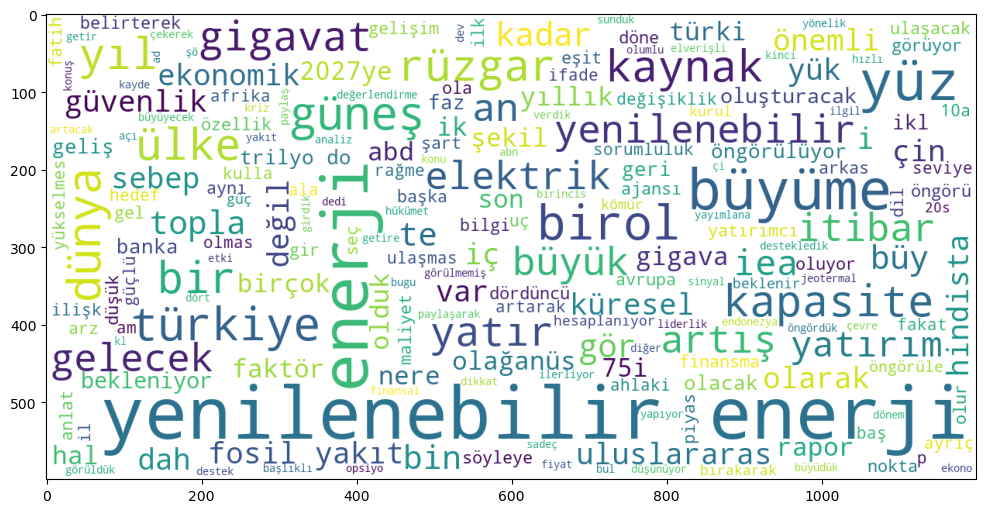

In [87]:
with requests.get('https://www.trthaber.com/haber/ekonomi/turkiye-yenilenebilir-enerjide-ilk-10-ulkeden-biri-olmayi-hedefliyor-728565.html') as link:
    soup = BeautifulSoup(link.content,'html.parser')
    read = ''.join([i.text for i in soup.find_all('p')])
data = re.sub(r'[^\w\s]','',read.lower()).split()
stemmer = TurkishStemmer()
cleaned = stemmer.stemWords(data)
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
plt.imshow(cloud.generate(' '.join(cleaned)))

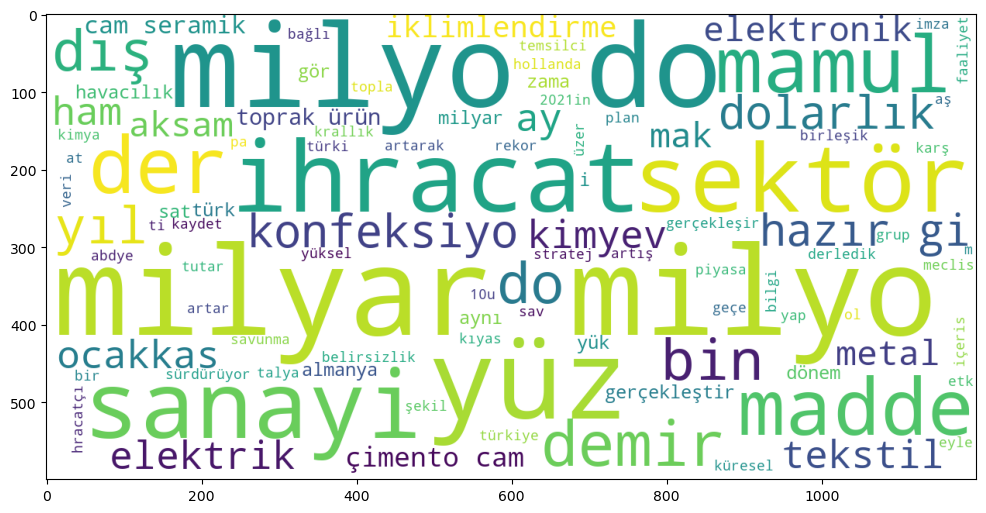

In [88]:
with requests.get('https://www.trthaber.com/haber/ekonomi/sanayi-sektorunden-rekor-ihracat-728604.html') as link:
    soup = BeautifulSoup(link.content,'html.parser')
    read = ''.join([i.text for i in soup.find_all('p')])
data = re.sub(r'[^\w\s]','',read.lower()).split()
stemmer = TurkishStemmer()
cleaned = stemmer.stemWords(data)
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
plt.imshow(cloud.generate(' '.join(cleaned)))

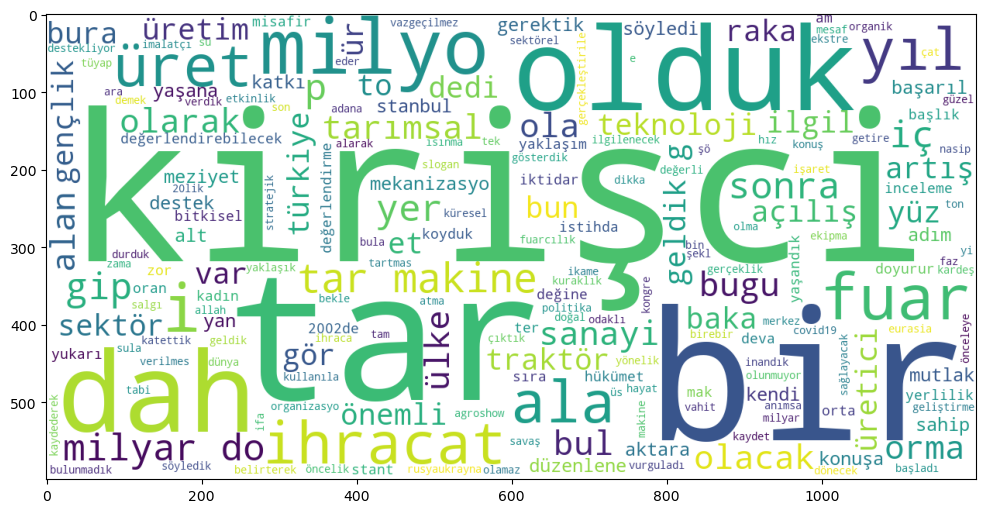

In [89]:
with requests.get('https://www.trthaber.com/haber/ekonomi/bitkisel-uretimde-rekor-bekleniyor-729089.html') as link:
    soup = BeautifulSoup(link.content,'html.parser')
    read = ''.join([i.text for i in soup.find_all('p')])
data = re.sub(r'[^\w\s]','',read.lower()).split()
stemmer = TurkishStemmer()
cleaned = stemmer.stemWords(data)
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
plt.imshow(cloud.generate(' '.join(cleaned)))

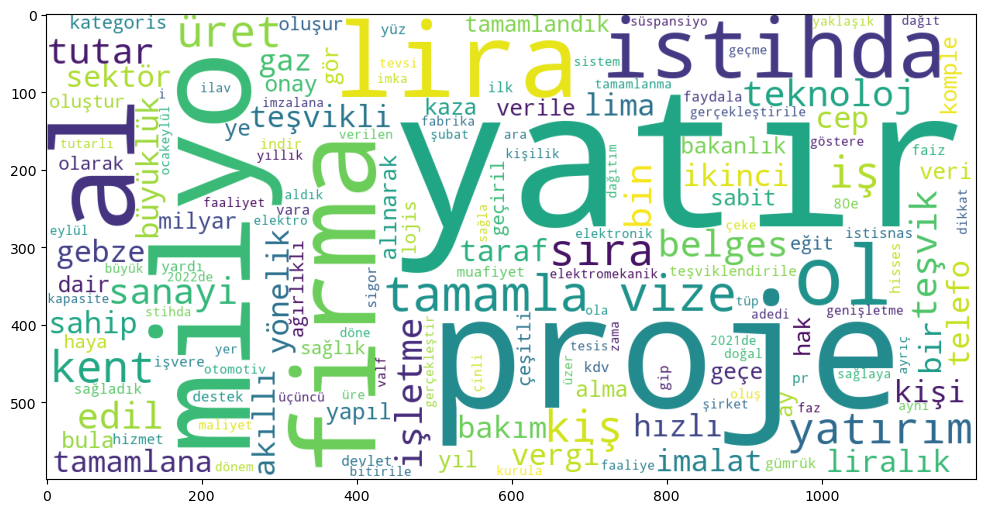

In [90]:
with requests.get('https://www.trthaber.com/haber/ekonomi/kocaelide-18-milyar-liralik-yatirima-tamamlama-vizesi-728931.html') as link:
    soup = BeautifulSoup(link.content,'html.parser')
    read = ''.join([i.text for i in soup.find_all('p')])
data = re.sub(r'[^\w\s]','',read.lower()).split()
stemmer = TurkishStemmer()
cleaned = stemmer.stemWords(data)
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
plt.imshow(cloud.generate(' '.join(cleaned)))

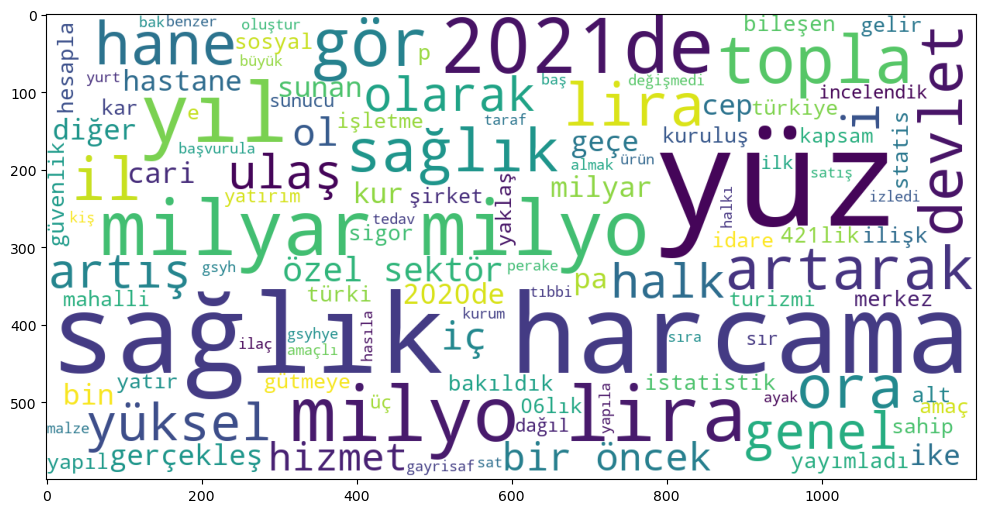

In [91]:
with requests.get('https://www.trthaber.com/haber/ekonomi/saglik-harcamalari-2021de-yuzde-416-artti-728914.html') as link:
    soup = BeautifulSoup(link.content,'html.parser')
    read = ''.join([i.text for i in soup.find_all('p')])
data = re.sub(r'[^\w\s]','',read.lower()).split()
stemmer = TurkishStemmer()
cleaned = stemmer.stemWords(data)
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
plt.imshow(cloud.generate(' '.join(cleaned)))

## Question 2

1. Using the library [tweepy](https://docs.tweepy.org/en/stable/index.html) pull 5000 tweets (in English) on any topic you'd like.

2. Clean the text and remove all stopwords. Then sketch a word cloud of your collection.

2. Using the library [NLTK](https://www.nltk.org/) apply sentiment analysis on the tweets you collected. 

3. Analyze your results.

In [ ]:
import tweepy as tw

## Question 3

For this question use [UFO Sightings Dataset](https://www.kaggle.com/code/hakeemtfrank/ufo-sightings-data-exploration/data) from Kaggle.

1. Ingest the dataset as a pandas dataframe, and clean it if necessary.

2. Plot a geographic heatmap of UFO sightings and find hotspots.

3. Is there a statistically verifiable correlation between shape of the UFO and the duration of the sighting. Investigate.

# Firstly, i am going to ingest the dataset as a pandas dataframe.

In [4]:
import geopandas as gpd

import plotly.express as px
import plotly.graph_objects as go
import geoplot
import mapclassify
import opendatasets as opd


from mpl_toolkits.basemap import Basemap
import csv

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [13]:
file = ('complete.csv')
data = pd.read_csv(file , on_bad_lines = 'skip')
data

/var/folders/f2/l215vhn11ml054hpybs9dbqw0000gn/T/ipykernel_58759/2970920458.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file , on_bad_lines = 'skip')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833


In [16]:
import matplotlib.pyplot as plt

# Secondly, i am going to plot a geographic heatmap of UFO sightings and find hotspots

ValueError: Unable to parse string "33q.200088" at position 48461

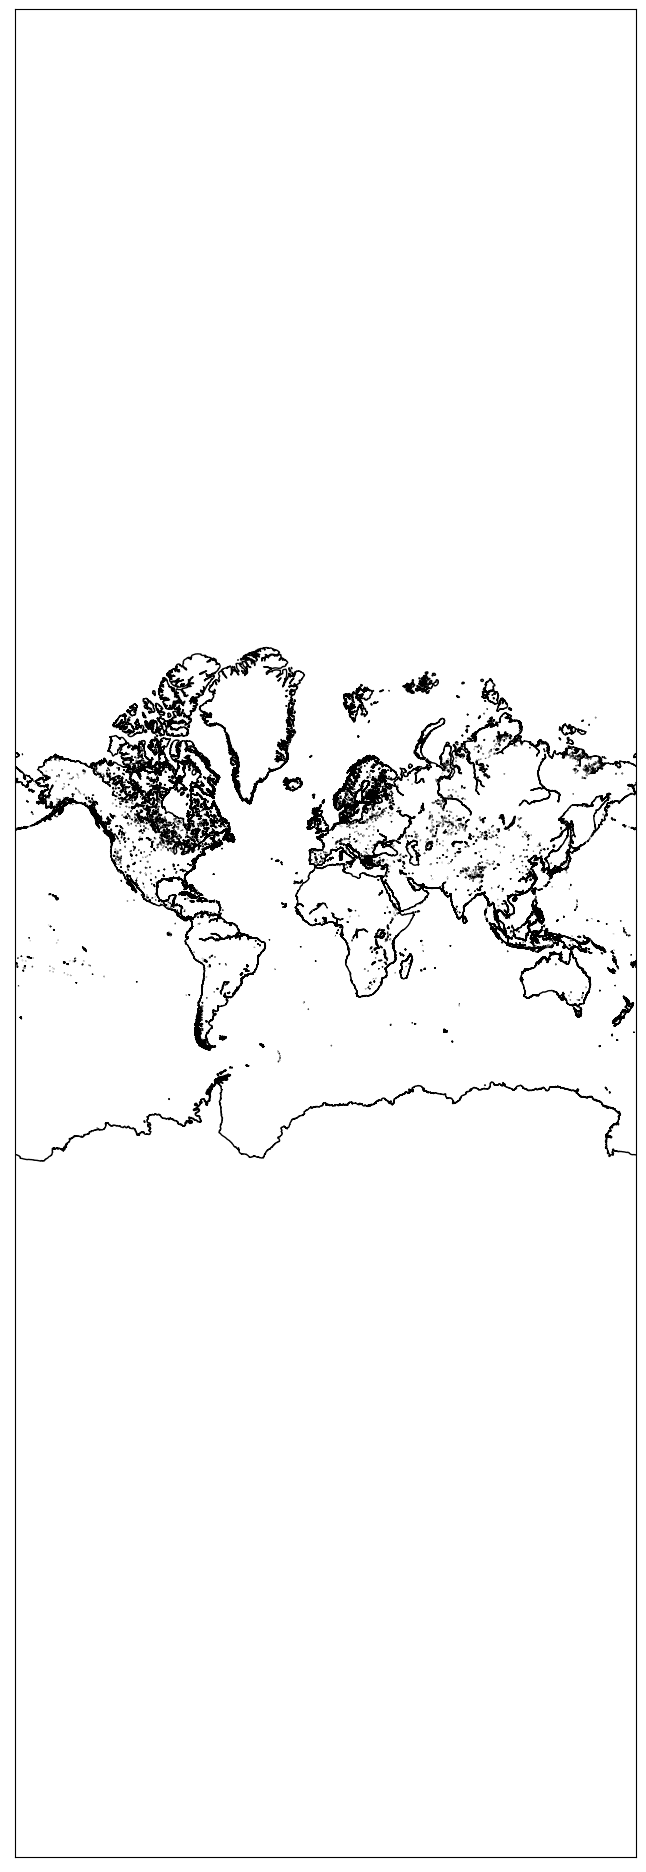

In [84]:
plt.figure(figsize=(24,24))

m = Basemap(projection='merc',
            resolution='h')

m.drawcoastlines()
data["longitude"] = pd.to_numeric(data["longitude"], downcast="float")
data["latitude"] = pd.to_numeric(data["latitude"], downcast="float")
xs,ys = m(data['longitude'], data['latitude'])
ss = np.exp(data['duration'])
m.scatter(xs, ys, c='red', s=ss, alpha=0.25)

In [ ]:
# I did not see any correlation between shape of the UFO and the duration of the sighting as that map.

## Question 4

For this question use [Turkish Institute of Statistics (TÜİK)](https://data.tuik.gov.tr/) data portal, and [The Humanitarian Data Exchange (HDX)](https://www.eea.europa.eu/data-and-maps/data/) data portal.

1. Get the population data for cities in Turkey as a pandas data frame from TUIK. Notice that TUIK generates the data only for human consumption. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done using python only. You are NOT allowed to clean it externally.

2. Get the crime statistics (Suçun İşlendiği İl ve Suç Türüne Göre Ceza İnfaz Kurumundan Çıkan Hükümlüler) as a pandas data frame from TUIK. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done python only. You are NOT allowed to clean it externally.

3. Get the shape files for the Turkish city municipality borders from HDX, ingest it as a geoPandas datafroma, and then clean it if necessary. Cleaning must be done using python only. You are NOT allowed to clean it externally.

4. Merge the population data, crime data, and the shapefile data into a single geoPandas dataframe.

5. Plot the population data as a choropleth map as I did in the class.

6. Plot the crime data for different categories. However, don't use the raw numbers. Use the normalized data with respect to the population of the city.

# Firslty, i am going to get the population data for cities in Turkey as a pandas dataframe.

In [7]:
file = 'yillara gore il nufuslari.xls'
dataset = pd.read_excel(file)
dataset_cleaned = dataset.dropna()
dataset_cleaned

,"Yıllara göre il nüfusları, 2000-2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
3,Toplam-Total,64729501,65603160.0,66401851.0,67187251.0,68010215.0,68860539.0,69729967.0,70586256,71517100.0,...,75627384.0,76667864.0,77695904.0,78741053,79814871.0,80810525.0,82003882.0,83154997.0,83614362.0,84680273.0
4,Adana,1879695,1899324.0,1916637.0,1933428.0,1951142.0,1969512.0,1988277.0,2006650,2026319.0,...,2125635.0,2149260.0,2165595.0,2183167,2201670.0,2216475.0,2220125.0,2237940.0,2258718.0,2263373.0
5,Adıyaman,568432,571180.0,573149.0,574886.0,576808.0,578852.0,580926.0,582762,585067.0,...,595261.0,597184.0,597835.0,602774,610484.0,615076.0,624513.0,626465.0,632459.0,632148.0
6,Afyonkarahisar,696292,698029.0,698773.0,699193.0,699794.0,700502.0,701204.0,701572,697365.0,...,703948.0,707123.0,706371.0,709015,714523.0,715693.0,725568.0,729483.0,736912.0,744179.0
7,Ağrı,519190,521514.0,523123.0,524514.0,526070.0,527732.0,529417.0,530879,532180.0,...,552404.0,551177.0,549435.0,547210,542255.0,536285.0,539657.0,536199.0,535435.0,524644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Yalova,144923,150027.0,155041.0,160099.0,165333.0,170705.0,176207.0,181758,197412.0,...,211799.0,220122.0,226514.0,233009,241665.0,251203.0,262234.0,270976.0,276050.0,291001.0
81,Karabük,205172,207241.0,209056.0,210812.0,212667.0,214591.0,216557.0,218463,216248.0,...,225145.0,230251.0,231333.0,236978,242347.0,244453.0,248014.0,248458.0,243614.0,249287.0
82,Kilis,109698,111024.0,112219.0,113387.0,114615.0,115886.0,117185.0,118457,120991.0,...,124320.0,128586.0,128781.0,130655,130825.0,136319.0,142541.0,142490.0,142792.0,145826.0
83,Osmaniye,411163,417418.0,423214.0,428943.0,434930.0,441108.0,447428.0,452880,464704.0,...,492135.0,498981.0,506807.0,512873,522175.0,527724.0,534415.0,538759.0,548556.0,553012.0


# And then, i am going to get the crime statistics data as a pandas dataframe

In [8]:
file_excel = 'hukumluler.xls'
dataset2 = pd.read_excel(file_excel)
dataset2_cleaned = dataset2.dropna()
dataset2_cleaned

,"İBBS 3. Düzeyde, suçun işlendiği il ve suç türüne göre ceza infaz kurumundan çıkan hükümlüler, 2011-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
15,TR,Türkiye,Toplam - Total,361870,5945,57713,4899,6500,6638,76698,...,758,11896,11917,6640,11908,3327,7074,6438,55840,189
19,TR100,İstanbul,Erkek - Male,56418,934,7121,758,1011,704,12158,...,52,2189,1080,718,1114,431,857,649,8741,42
22,TR211,Tekirdağ,Erkek - Male,4327,76,635,75,88,72,1035,...,2,105,136,384,119,40,74,137,488,1
25,TR212,Edirne,Erkek - Male,3036,39,378,27,47,37,467,...,5,42,63,326,70,17,29,33,892,1
28,TR213,Kırklareli,Erkek - Male,1992,30,291,27,16,22,384,...,11,30,87,178,69,31,23,41,416,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,TRC22,Diyarbakır,Erkek - Male,3078,96,310,25,41,13,513,...,-,169,34,34,63,26,24,38,485,-
1327,TRC31,Mardin,Erkek - Male,1013,41,115,12,8,9,151,...,3,42,20,2,44,9,14,20,225,-
1330,TRC32,Batman,Erkek - Male,733,16,74,3,6,6,194,...,-,24,10,2,19,4,6,21,172,-
1333,TRC33,Şırnak,Erkek - Male,552,18,35,5,1,2,41,...,-,36,1,3,7,2,8,1,133,-


# The last data will be the shape files for the Turkish city municipality borders, and i am going to ingest the data as a geopandas dataframe.


In [9]:
import geopandas as gpd

In [23]:
from osgeo import gdal

In [33]:
shape_file = fiona.open('tr_1km.shp')
dataset3 = gpd.read_file(shape_file)
dataset3
# I tried all of data samples but i could not get the correct one, so i coded plot scripts on following parts but
# i could not get start.

DriverError: Unable to open tr_1km.shx or tr_1km.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

# I am going to merge the datas that i got. 

In [19]:
merged_data = dataset_cleaned.merge(dataset2_cleaned,on="Unnamed: 1").merge(dataset3,on="geometry")



KeyError: ''

# I am going to Plot the population data as a choropleth map.

In [13]:
ax = merged_data.boundary.plot(figsize=(20,4),color='white')
merged_data.plot(ax=ax, column='Unnamed: 3', 
         cmap='coolwarm', legend=True)
# I cannot define merged_data because of my dataset, so i could not plot this script.

NameError: name 'merged_data' is not defined

# Finally, i am going to Plot the crime data for different categories.